Задача: определиться с моделью.
<br>На выбор:
- решающее дерево
- случайный лес
- градиентный бустинг
- AdaBoost

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

TRAIN_DATASET_PATH = 'csv/train.csv'
df = pd.read_csv(TRAIN_DATASET_PATH)

x = df.drop(columns=["Id", "mean_exam_points"])
y = df["mean_exam_points"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=100)

### Решающее дерево

In [2]:
from sklearn.tree import DecisionTreeRegressor

max_depth_arr = np.arange(2, 20)

accuracy_test = []
accuracy_train = []
for val in max_depth_arr:
    clf = DecisionTreeRegressor(max_depth=val, random_state=100)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    acc_test = r2_score(y_test, y_pred)
    acc_train = r2_score(y_train, y_pred_train)
    accuracy_test.append(acc_test)
    accuracy_train.append(acc_train)
    
    print(f'Depth {val}: {acc_test} / {acc_train}')

Depth 2: 0.540859516630043 / 0.542477475538185
Depth 3: 0.5975892566092703 / 0.5944864118343338
Depth 4: 0.6390824490006198 / 0.6287723354672998
Depth 5: 0.6461577667269558 / 0.6468144358891845
Depth 6: 0.6461643524717903 / 0.6651002773104269
Depth 7: 0.6383711556131098 / 0.6760920702487212
Depth 8: 0.6295098341252293 / 0.6915788427173999
Depth 9: 0.6047584316287744 / 0.7112257408472555
Depth 10: 0.5803579457162789 / 0.7326255108389745
Depth 11: 0.5661994640443634 / 0.7535321691867493
Depth 12: 0.5331255859586529 / 0.7765902606674173
Depth 13: 0.5206189064838511 / 0.7997891660015001
Depth 14: 0.48761906531490307 / 0.8237032611065709
Depth 15: 0.46647249771147725 / 0.8467032699037617
Depth 16: 0.44133483969383713 / 0.867590775004047
Depth 17: 0.42831021531967584 / 0.8872705878318086
Depth 18: 0.4143039678417314 / 0.9031116196694262
Depth 19: 0.3923138823899638 / 0.9182855343214249


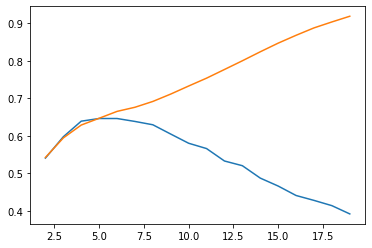

In [3]:
plt.plot(max_depth_arr, accuracy_test)
plt.plot(max_depth_arr, accuracy_train)

Оптимальный результат с глубиной дерева 5 = 0.6461577667269558 / 0.6468144358891845

### Случайный лес

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = [{'n_estimators': np.arange(50, 300, 50),
              'max_features': np.arange(2, 10),
              'max_depth': np.arange(2, 15)}]

clf = GridSearchCV(estimator=RandomForestRegressor(random_state=100),
                  param_grid=parameters,
                  scoring='r2',
                  cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=100),
             param_grid=[{'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                          'max_features': array([2, 3, 4, 5, 6, 7, 8, 9]),
                          'n_estimators': array([ 50, 100, 150, 200, 250])}],
             scoring='r2')

In [8]:
clf.best_estimator_

RandomForestRegressor(max_depth=7, max_features=9, n_estimators=150,
                      random_state=100)

In [9]:
clf.best_score_

0.6515762494048711

In [10]:
rfr = RandomForestRegressor(max_depth=7, max_features=9, n_estimators=150, random_state=100)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
y_pred_train = rfr.predict(X_train)
acc_test = r2_score(y_test, y_pred)
acc_train = r2_score(y_train, y_pred_train)
acc_test, acc_train

(0.6629965688247158, 0.6881439312801216)

Оптимальный результат со случайным лесом - 0.6629965688247158, 0.6881439312801216. Что не сильно отличается от обычного дерева решений.

### Gradient Boosting regression

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

parameters = [{'n_estimators': np.arange(50, 300, 50),
              'max_features': np.arange(2, 10),
              'max_depth': np.arange(2, 15)}]

clf = GridSearchCV(estimator=GradientBoostingRegressor(random_state=100),
                  param_grid=parameters,
                  scoring='r2',
                  cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=100),
             param_grid=[{'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                          'max_features': array([2, 3, 4, 5, 6, 7, 8, 9]),
                          'n_estimators': array([ 50, 100, 150, 200, 250])}],
             scoring='r2')

In [12]:
clf.best_estimator_

GradientBoostingRegressor(max_depth=5, max_features=8, n_estimators=50,
                          random_state=100)

In [13]:
clf.best_score_

0.6478749535991358

In [14]:
rfr = GradientBoostingRegressor(max_depth=5, max_features=8, n_estimators=50, random_state=100)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
y_pred_train = rfr.predict(X_train)
acc_test = r2_score(y_test, y_pred)
acc_train = r2_score(y_train, y_pred_train)
acc_test, acc_train

(0.6614780246715576, 0.688276309150083)

Gradient Boosting regression best: 0.6614780246715576, 0.688276309150083
<br>Результат такой же или чуть хуже случайного леса

### AdaBoostRegressor

In [17]:
from sklearn.ensemble import AdaBoostRegressor

parameters = [{'n_estimators': np.arange(50, 300, 50)}]

clf = GridSearchCV(estimator=AdaBoostRegressor(random_state=100),
                  param_grid=parameters,
                  scoring='r2',
                  cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=100),
             param_grid=[{'n_estimators': array([ 50, 100, 150, 200, 250])}],
             scoring='r2')

In [18]:
clf.best_estimator_

AdaBoostRegressor(random_state=100)

In [19]:
clf.best_score_

0.5935082523968128

In [20]:
rfr = AdaBoostRegressor(random_state=100)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
y_pred_train = rfr.predict(X_train)
acc_test = r2_score(y_test, y_pred)
acc_train = r2_score(y_train, y_pred_train)
acc_test, acc_train

(0.6099025347561622, 0.6002496871174363)

AdaBoostRegressor: 0.6099025347561622, 0.6002496871174363

### Вывод: использовать Случайный лес, с параметрами max_depth=5, max_features=8, n_estimators=50